<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Stock_3_sandy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/GL_Project_Sandy/Banknifty_5m_data_1_oct.csv")

In [4]:
df.shape

(4499, 7)

In [5]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


Removing Time string. Take date/month/year alone for analysis

In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.date

In [7]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   4499 non-null   object 
 1   Open       4499 non-null   float64
 2   High       4499 non-null   float64
 3   Low        4499 non-null   float64
 4   Close      4499 non-null   float64
 5   Adj Close  4499 non-null   float64
 6   Volume     4499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 246.2+ KB


In [9]:
df.isnull().sum()

Datetime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Converting the data type from "object" to "datetime" for the "Datetime"

In [10]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Datetime   4499 non-null   datetime64[ns]
 1   Open       4499 non-null   float64       
 2   High       4499 non-null   float64       
 3   Low        4499 non-null   float64       
 4   Close      4499 non-null   float64       
 5   Adj Close  4499 non-null   float64       
 6   Volume     4499 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 246.2 KB


In [12]:
print(f'DataFrame contains stock between {df.Datetime.min()} {df.Datetime.max()}')
print(f'Total numner of days = {(df.Datetime.max()- df.Datetime.min()).days} days')

DataFrame contains stock between 2022-07-06 00:00:00 2022-09-30 00:00:00
Total numner of days = 86 days


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.0
mean,38232.863543,38259.840769,38205.939855,38233.823223,38233.823223,0.0
std,1964.348261,1965.959555,1962.130293,1963.918792,1963.918792,0.0
min,33929.398438,34074.750000,33916.101562,33992.148438,33992.148438,0.0
25%,36712.449219,36728.974609,36674.500000,36711.701172,36711.701172,0.0
50%,38413.000000,38450.750000,38387.199219,38414.699219,38414.699219,0.0
75%,39513.699219,39542.724609,39492.875000,39516.650391,39516.650391,0.0
max,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219,0.0


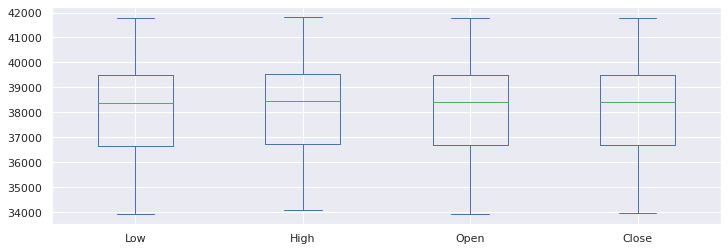

In [14]:
df[['Low','High','Open','Close']].plot(kind= 'box', figsize=(12,4))

In [15]:
df.set_index('Datetime', inplace = True)

In [16]:
df.drop(["Volume"], axis = 1, inplace = True)

In [17]:
df.head()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438
2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438
2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219
2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219
2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000


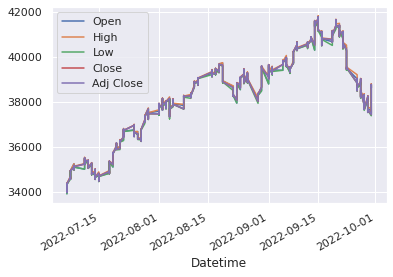

In [18]:
df.plot()

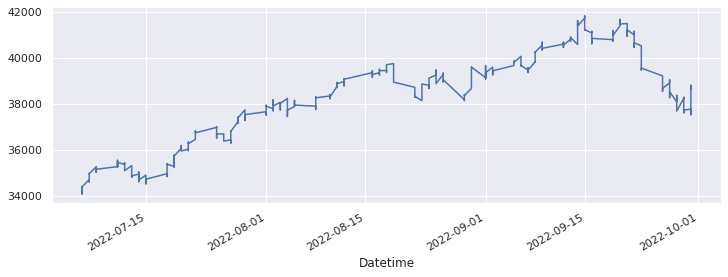

In [19]:
df['High'].plot(figsize=(12,4))

Adding some other parameter for better visualization

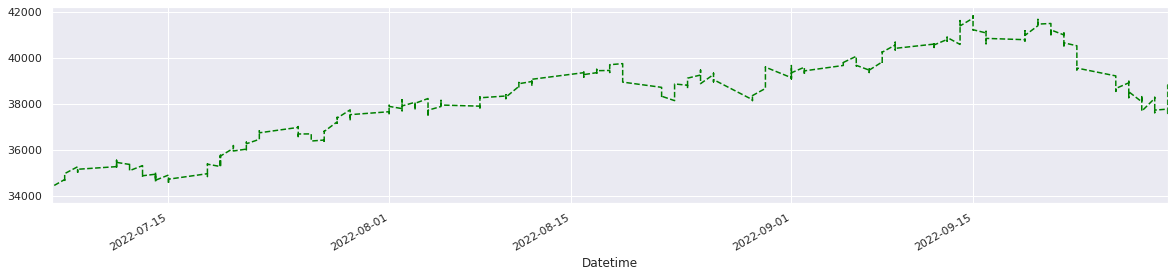

In [20]:
df['High'].plot(xlim=['2022-07-06', '2022-09-30'], figsize=(20,4),ls='--',c='green')

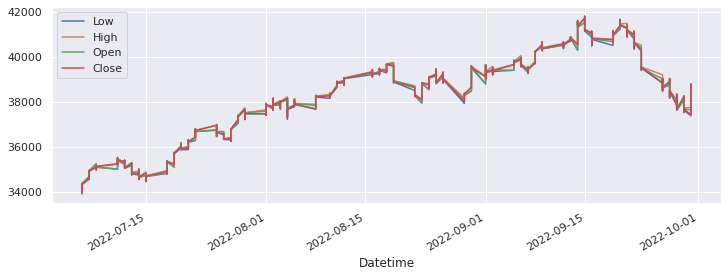

In [21]:
df[['Low','High','Open','Close']].plot(figsize=(12,4))

Checking the details of last day or end of the year. Since we have only 3 monts of data, displyed only one record of last day of the year. Suppose If we have 5 years of data, will get the details of end of the year data seperately for 5 years. 

In [22]:
df.resample(rule='A').min()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,33929.398438,34074.75,33916.101562,33992.148438,33992.148438


In [23]:
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-12-31,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219


Checked what is the minimum and maximum prize at the year end.

We can check how quartley the price is varying. Since we have only 3 months of data, only one record.

In [24]:
df.resample(rule='QS').min()['High']

Datetime
2022-07-01    34074.75
Freq: QS-JAN, Name: High, dtype: float64

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 210.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


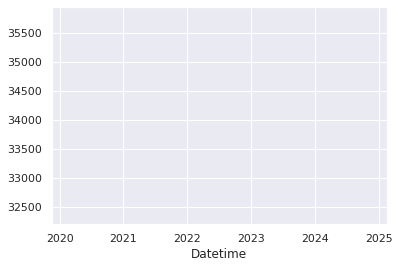

In [25]:
df.resample(rule='QS').min()['High'].plot()

In [26]:
df.resample(rule='QS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: QS-JAN, Name: High, dtype: float64

Business End Frequency

In [27]:
df.resample(rule='BA').max()['High']

Datetime
2022-12-30    41830.351562
Freq: BA-DEC, Name: High, dtype: float64

Business End Frequency quartley

In [28]:
df.resample(rule='BQS').max()['High']

Datetime
2022-07-01    41830.351562
Freq: BQS-JAN, Name: High, dtype: float64

**Fetching the maximum price from lastday of Month**

In [29]:
df['Open'].resample(rule='M').max()

Datetime
2022-07-31    37717.300781
2022-08-31    39732.648438
2022-09-30    41795.851562
Freq: M, Name: Open, dtype: float64

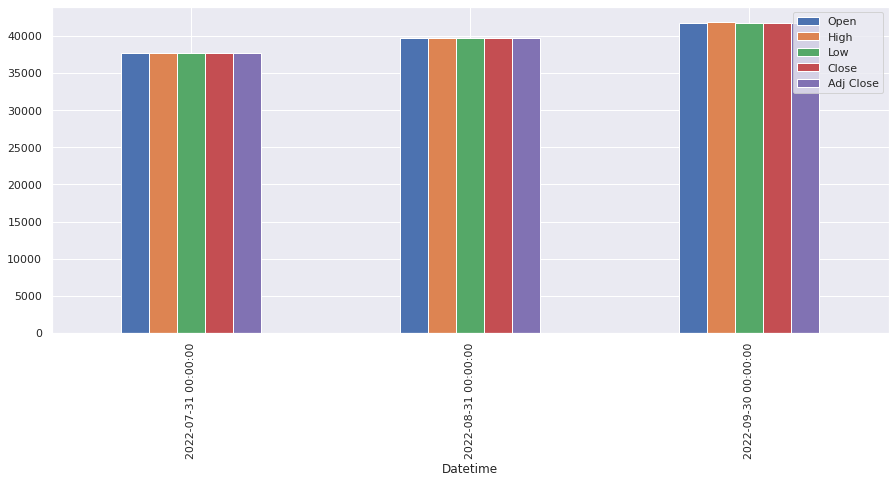

In [30]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

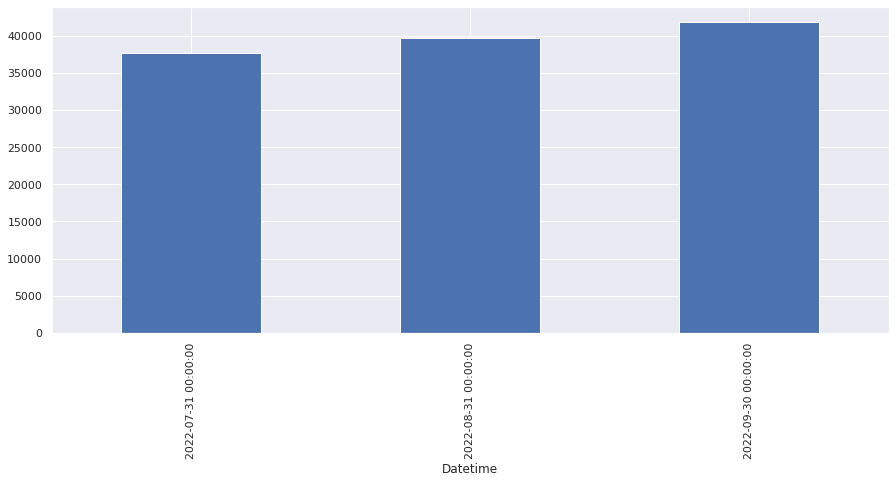

In [31]:
df['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Fetching the minimum price from lastday of Month**

In [32]:
df['Open'].resample(rule='M').min()

Datetime
2022-07-31    33929.398438
2022-08-31    37349.550781
2022-09-30    37428.148438
Freq: M, Name: Open, dtype: float64

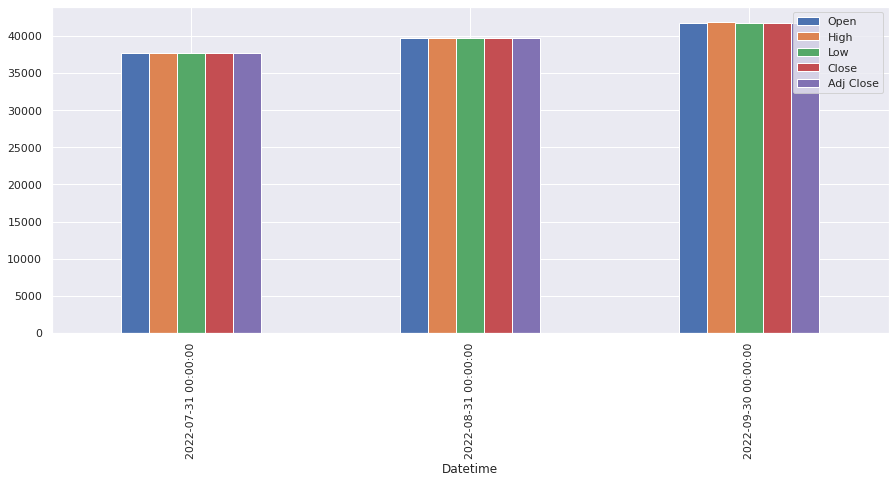

In [33]:
df.resample(rule='M').max().plot(kind='bar',figsize=(15,6))

**Fetching the maximum price from begining of Month**

In [34]:
df.resample(rule='MS').max()

,Open,High,Low,Close,Adj Close
Datetime,,,,,
2022-07-01,37717.300781,37737.898438,37665.550781,37696.898438,37696.898438
2022-08-01,39732.648438,39750.898438,39663.398438,39680.199219,39680.199219
2022-09-01,41795.851562,41830.351562,41766.300781,41788.199219,41788.199219


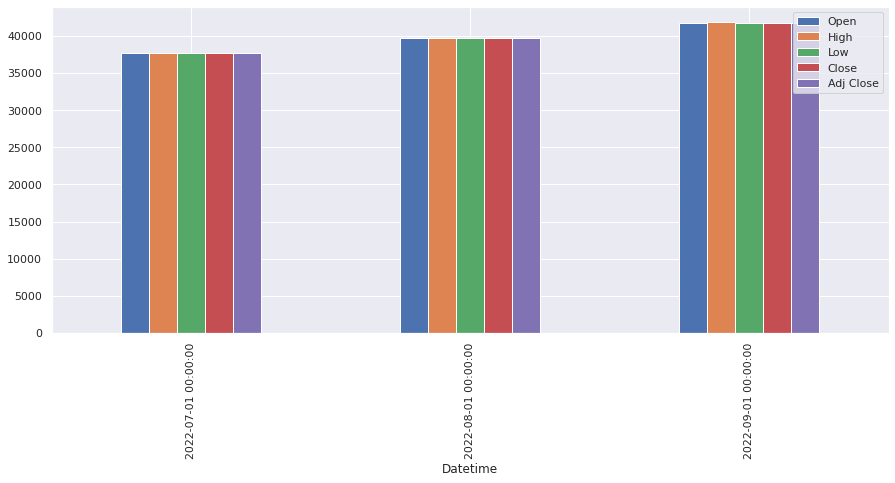

In [35]:
df.resample(rule='MS').max().plot(kind='bar',figsize=(15,6))

Reference: https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78


**Simple Moving Average**

In [44]:
df['Open:10 days rolling']=df['Open'].rolling(10).mean()

In [47]:
df.head(20)

,Open,High,Low,Close,Adj Close,Open:30 days rolling,Open:10 days rolling
Datetime,,,,,,,
2022-07-06,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,NaN,NaN
2022-07-06,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,NaN,NaN
2022-07-06,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,NaN,NaN
2022-07-06,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,NaN,NaN
2022-07-06,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,NaN,NaN
2022-07-06,34093.550781,34102.050781,33988.800781,33992.148438,33992.148438,NaN,NaN
2022-07-06,33997.500000,34107.148438,33962.851562,34107.148438,34107.148438,NaN,NaN
2022-07-06,34108.699219,34138.800781,34098.250000,34117.101562,34117.101562,NaN,NaN
2022-07-06,34118.300781,34122.648438,34051.000000,34060.300781,34060.300781,NaN,NaN


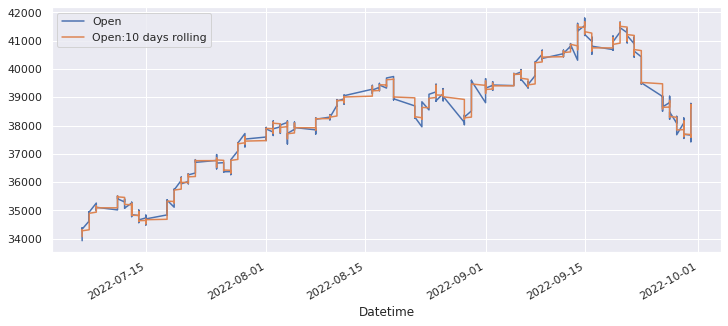

In [46]:
df[['Open','Open:10 days rolling']].plot(figsize=(12,5))

MITO is one of the widely use Auto EDA tool which will be specificall used for Finacial Data and stock market data.

Exception: The mitosheet currently only works in JupyterLab.


In [39]:
!pip install mitoinstaller

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
!pip install mitosheet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import mitosheet